In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))
#print(x1_label0)
#print(x2_label0)
#blah = np.hstack((x1_label0, x2_label0))
#print(blah.shape)
#print(blah[0][0])
#print(blah[1][0])
#print(blah[0][1])
#print(blah[1][1])

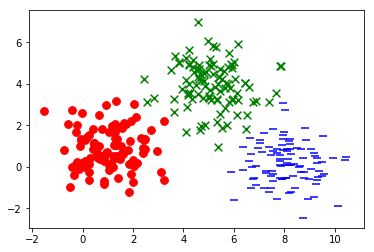

In [3]:
plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()

In [4]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))
xs = np.vstack((xs_label0, xs_label1, xs_label2))

In [5]:
print(xs.shape)

(300, 2)


In [6]:
labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))

In [7]:
arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

In [8]:
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))
test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0.,1.]] * 10)
train_size, num_features = xs.shape

In [9]:
print(xs.shape)
print(labels.shape)

(300, 2)
(300, 3)


In [10]:
learning_rate = 0.01
training_epochs = 1000
num_labels = 3
batch_size = 100

In [11]:
X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])
W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
cost = -tf.reduce_sum(Y * tf.log(y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [13]:
correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [14]:
saver = tf.train.Saver()
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for step in range(training_epochs * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset + batch_size), :]
        batch_labels = labels[offset:(offset + batch_size)]
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
        print (step, err)
    
    W_val = sess.run(W)
    print('w', W_val)
    b_val = sess.run(b)
    print('b', b_val)
    print("accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels}))
    save_path = saver.save(sess, "./ch4-softmax-reg-model.ckpt")
    print("Model saved in path: %s" % save_path)

0 109.86121
1 164.03452
2 575.82916
3 620.2912
4 52.220566
5 65.120964
6 47.668053
7 29.909027
8 44.116325
9 21.003836
10 21.985138
11 39.13624
12 20.573885
13 26.398819
14 34.44509
15 16.048027
16 16.906603
17 32.7458
18 17.538342
19 22.115417
20 27.754154
21 12.099645
22 13.61659
23 26.500015
24 12.181765
25 13.401407
26 24.189516
27 10.478332
28 11.791219
29 23.021305
30 10.306667
31 11.283312
32 21.58799
33 9.59518
34 10.560584
35 20.57348
36 9.24045
37 10.057837
38 19.618391
39 8.854757
40 9.596689
41 18.81401
42 8.541476
43 9.206381
44 18.10686
45 8.262226
46 8.867153
47 17.48858
48 8.016936
49 8.572023
50 16.944275
51 7.799132
52 8.313417
53 16.463139
54 7.604635
55 8.085306
56 16.035912
57 7.4297957
58 7.882671
59 15.654905
60 7.2715964
61 7.7013884
62 15.31364
63 7.127514
64 7.538079
65 15.006672
66 6.995451
67 7.389972
68 14.729414
69 6.873652
70 7.2547975
71 14.477981
72 6.7606673
73 7.130695
74 14.249076
75 6.655282
76 7.0161324
77 14.039897
78 6.556491
79 6.9098463
80 13.8

625 3.984992
626 8.097192
627 2.4452488
628 3.9824
629 8.085089
630 2.4384358
631 3.979829
632 8.073036
633 2.43167
634 3.97728
635 8.061036
636 2.4249463
637 3.9747512
638 8.049089
639 2.4182677
640 3.9722445
641 8.037193
642 2.4116337
643 3.9697616
644 8.02535
645 2.405042
646 3.9672956
647 8.013554
648 2.3984914
649 3.964852
650 8.00181
651 2.391983
652 3.9624286
653 7.990116
654 2.3855183
655 3.9600222
656 7.9784713
657 2.3790944
658 3.9576387
659 7.9668736
660 2.3727102
661 3.9552732
662 7.9553275
663 2.3663666
664 3.9529269
665 7.9438276
666 2.360063
667 3.9505978
668 7.932378
669 2.353799
670 3.9482865
671 7.920972
672 2.347574
673 3.9459963
674 7.9096127
675 2.3413887
676 3.943722
677 7.898305
678 2.3352406
679 3.9414656
680 7.88704
681 2.3291302
682 3.9392252
683 7.875821
684 2.3230593
685 3.9370031
686 7.864647
687 2.3170235
688 3.9347951
689 7.85352
690 2.3110247
691 3.9326057
692 7.8424373
693 2.3050632
694 3.9304335
695 7.831399
696 2.2991383
697 3.9282765
698 7.8204036
69

1276 3.6565812
1277 6.2648563
1278 1.5704813
1279 3.6555078
1280 6.25886
1281 1.5680875
1282 3.6544342
1283 6.252879
1284 1.5657016
1285 3.6533632
1286 6.2469134
1287 1.5633229
1288 3.652292
1289 6.240962
1290 1.5609568
1291 3.651226
1292 6.235026
1293 1.5585961
1294 3.6501575
1295 6.229106
1296 1.556246
1297 3.6490915
1298 6.223197
1299 1.5539037
1300 3.6480253
1301 6.2173095
1302 1.5515703
1303 3.646963
1304 6.211431
1305 1.5492445
1306 3.6458988
1307 6.2055683
1308 1.5469273
1309 3.644837
1310 6.199722
1311 1.5446202
1312 3.6437755
1313 6.1938934
1314 1.5423203
1315 3.642717
1316 6.1880736
1317 1.540029
1318 3.6416607
1319 6.1822686
1320 1.5377458
1321 3.640604
1322 6.1764812
1323 1.5354712
1324 3.6395485
1325 6.170706
1326 1.5332046
1327 3.6384935
1328 6.1649466
1329 1.5309461
1330 3.6374402
1331 6.1592007
1332 1.5286964
1333 3.6363876
1334 6.153468
1335 1.5264535
1336 3.6353369
1337 6.147751
1338 1.5242207
1339 3.6342864
1340 6.1420484
1341 1.5219941
1342 3.6332376
1343 6.1363597


1835 5.3595743
1836 1.239846
1837 3.4697433
1838 5.35562
1839 1.2385346
1840 3.4687936
1841 5.351674
1842 1.2372277
1843 3.4678433
1844 5.347739
1845 1.2359222
1846 3.4668922
1847 5.34381
1848 1.2346228
1849 3.465944
1850 5.339889
1851 1.2333261
1852 3.464996
1853 5.335973
1854 1.2320336
1855 3.4640458
1856 5.332066
1857 1.2307436
1858 3.4630995
1859 5.328169
1860 1.2294579
1861 3.4621503
1862 5.324277
1863 1.2281765
1864 3.4612014
1865 5.3203936
1866 1.2268977
1867 3.4602559
1868 5.316516
1869 1.2256224
1870 3.4593105
1871 5.3126493
1872 1.2243513
1873 3.4583642
1874 5.308788
1875 1.2230841
1876 3.4574192
1877 5.304932
1878 1.22182
1879 3.456474
1880 5.3010864
1881 1.2205586
1882 3.4555304
1883 5.2972507
1884 1.2193017
1885 3.454586
1886 5.293419
1887 1.218048
1888 3.4536428
1889 5.289595
1890 1.2167974
1891 3.4526978
1892 5.285779
1893 1.2155498
1894 3.4517531
1895 5.2819705
1896 1.2143072
1897 3.4508092
1898 5.278171
1899 1.2130668
1900 3.4498682
1901 5.274377
1902 1.2118306
1903 3.

2421 1.0394633
2422 3.2917116
2423 4.709378
2424 1.0386606
2425 3.2908347
2426 4.7065954
2427 1.0378602
2428 3.2899618
2429 4.7038183
2430 1.0370613
2431 3.2890909
2432 4.701044
2433 1.0362647
2434 3.2882178
2435 4.6982727
2436 1.0354687
2437 3.2873437
2438 4.6955104
2439 1.0346743
2440 3.2864718
2441 4.692748
2442 1.0338824
2443 3.2855976
2444 4.6899953
2445 1.0330933
2446 3.2847285
2447 4.687243
2448 1.0323043
2449 3.2838588
2450 4.6844945
2451 1.031517
2452 3.2829888
2453 4.6817536
2454 1.0307318
2455 3.2821178
2456 4.6790156
2457 1.0299497
2458 3.2812488
2459 4.6762824
2460 1.0291674
2461 3.2803807
2462 4.6735516
2463 1.0283881
2464 3.2795084
2465 4.6708274
2466 1.0276107
2467 3.2786438
2468 4.668107
2469 1.0268332
2470 3.2777758
2471 4.665389
2472 1.0260593
2473 3.2769086
2474 4.6626782
2475 1.0252858
2476 3.276039
2477 4.6599727
2478 1.0245136
2479 3.275173
2480 4.6572695
2481 1.0237453
2482 3.2743065
2483 4.654569
2484 1.0229769
2485 3.2734406
2486 4.6518745
2487 1.0222107
2488 

In [15]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, save_path)
    print("Model restored.")   
    print(np.argmax(y_model.eval(feed_dict={X: [[6., -2.]], W: W_val, b: b_val}), 1))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./ch4-softmax-reg-model.ckpt
Model restored.
[2]
